radius d91 = 10.000019047078775
radius d92 = 6.622748304390939
Done


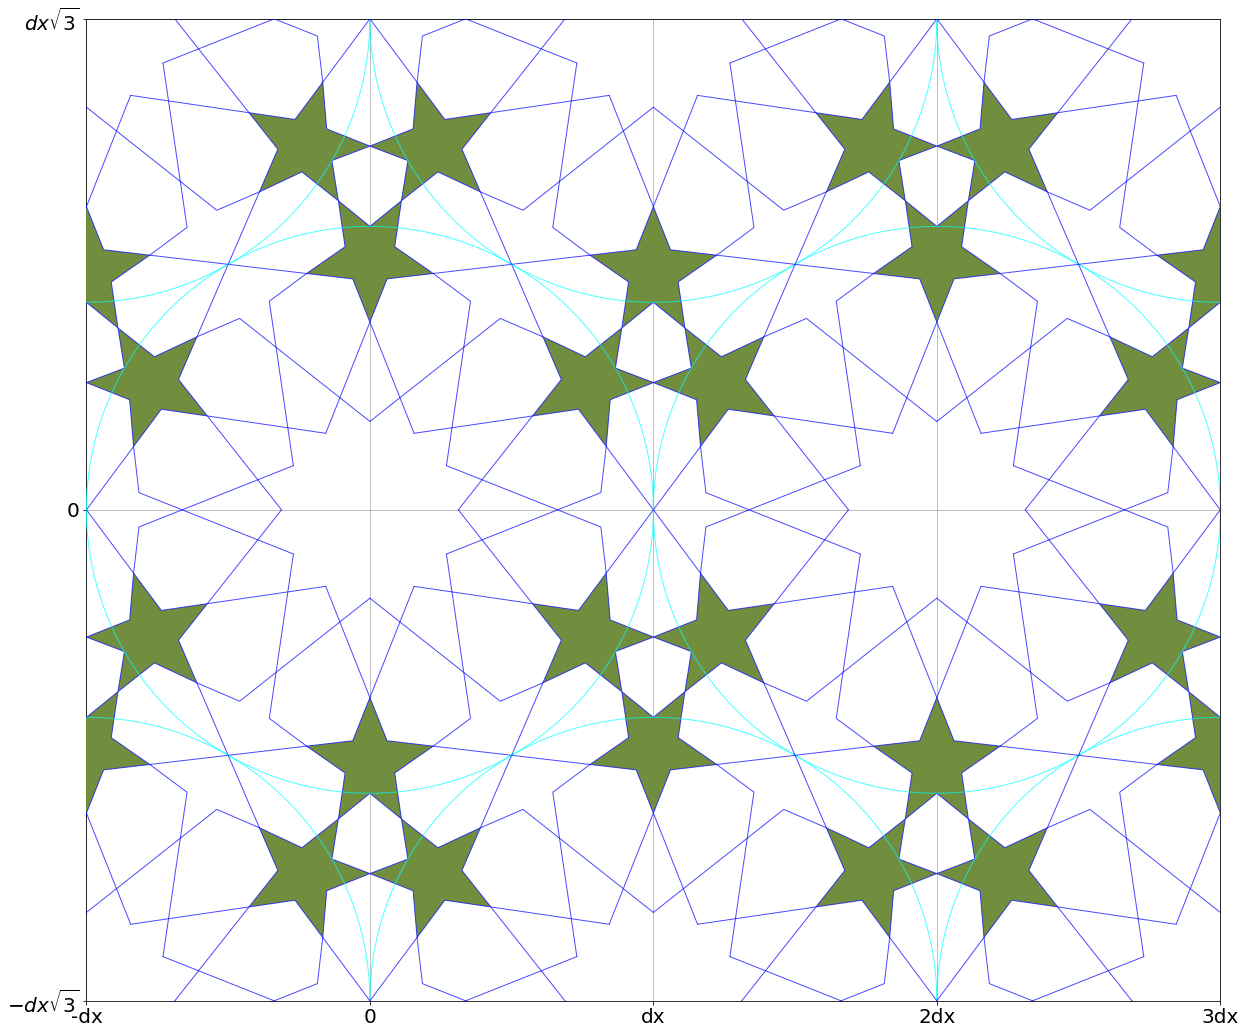

In [1]:
# new-rcm-12-8
# 2021-11-05
#
# python 3.8.2
# run on https://repl.it
#
# inspired by:
# Ayman Soliman [@FB/Analysis of the islamic geometric designs]
#
# pdf : The Geometric Rosette : analysis of an Islamic decorative motif
#
# 要執行本程式, 請按上方run▶
#
# to fix matplotlib warning
import os
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
#
import numpy as np
# 載入繪圖模組 pyplot, 重新命名為 plot
import matplotlib.pyplot as plt
#
from shapely import affinity
from shapely.geometry  import LineString, Point
#
# ---------------------------------------------
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin  = 2.5  # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
#
# end of def
#
def shapely_Arc(cxy, r, start_angle, end_angle) :

    numsegments = 1000
    # The coordinates of the arc
    theta = np.radians(np.linspace(start_angle, end_angle, numsegments))
    x = cxy[0] + r * np.cos(theta)
    y = cxy[1] + r * np.sin(theta)
    Arc = LineString(np.column_stack([x, y]))
    return Arc
#
# end of def
#
def motif_line(LS, COLOR, ZORDER, LINEWIDTH) :
    #
    xs, ys = LS.xy
    ax.plot(xs, ys, color=COLOR, alpha=0.7, linewidth=LINEWIDTH, solid_capstyle='round', zorder=ZORDER)
    return
# end def
#
def motif_fill(LS, color, ZORDER, Alpha) :
    #
    xs, ys = LS.xy
    ax.fill(xs, ys, alpha=Alpha, closed=True, edgecolor=None, facecolor=color, fill=True, zorder=ZORDER)
    return
#
def x_format_func(value, tick_number):
    # find number of multiples of r0
    N = int(np.round(value/10))
    if N == -1:
        return "-dx"
    elif N == 0:
        return "0"
    elif N == 1:
        return "dx"
    elif N == 2:
        return "2dx"
    elif N == 3:
        return "3dx"
    else:
        return " "
    # end if
# end def
#
def y_format_func(value, tick_number):
    # find number of multiples of 5*np.sqrt(3)
    N = int(np.round(value/(10*np.sqrt(3))))
    if N == -1:
        return r'$-dx\sqrt{3}$'
    elif N == 0:
        return "0"    
    elif N == 1:
        return r'$dx\sqrt{3}$'
    else:
        return " "
    # end if
# end def
#
# ------------------------------------------------------------------------------------------------
#
# tup7 is type of Tuple, have 7 indexed value
#
dx = 10
dy = dx*np.sqrt(3)
tup7 = set_graphic_area(4*dx, 2*dy) 
fig = plt.figure(figsize=(tup7[0], tup7[1])) # 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
ax = fig.add_subplot(1,1,1)   # 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
plt.xlim(-1*dx, 3*dx)    # 設定X軸的顯示範圍, from xmin to xmax
plt.ylim(-1*dy, 1*dy)    # 設定Y軸的顯示範圍, from ymin to ymax
#
xvalues = [-10,0,10,20,30]
yvalues = [-1*dy, 0, 1*dy]
plt.xticks(xvalues)
plt.yticks(yvalues)
plt.tick_params(labelsize=20)
#
ax.xaxis.set_major_formatter(plt.FuncFormatter(x_format_func))
ax.yaxis.set_major_formatter(plt.FuncFormatter(y_format_func))
#
plt.grid(True)
ax.set_axis_on()    # will turn on  grid line
# ax.set_axis_off() # will turn off grid line
#
# get current axes, set X,Y same ratio & scale  
plt.gca().set_aspect('equal', adjustable='box')
#
r0  = 8.9354
cxy = (0,0)
#
Hline = LineString([(-r0,0), (r0,0)])
point_1_xy = (r0,0)
point_2_xy = (r0*np.cos(5*np.pi/12), r0*np.sin(5*np.pi/12))
point_3_xy = (r0*np.cos(7*np.pi/12), r0*np.sin(7*np.pi/12))
point_1    = Point(point_1_xy)
point_2    = Point(point_2_xy)
point_3    = Point(point_3_xy)
d1 = point_2.distance(point_3) / 2
d92= r0 - d1
#
Hline = LineString([(r0+d1,0), (-r0-d1,0)])
line_left  = affinity.rotate(Hline,105, cxy)
line_right = affinity.rotate(Hline, 75, cxy)
r15_line_left  = affinity.rotate(line_left,  15, cxy)
r15_line_right = affinity.rotate(line_right, 15, cxy)
#
line_p2_p3 = LineString([point_2_xy, point_3_xy])
r15_line_p2_p3 = affinity.rotate(line_p2_p3, 15, cxy)
#
bisector_degree = (90-15)/2
mid_1 = line_p2_p3.interpolate(0.5, normalized = True)
mid_2 = affinity.rotate(mid_1, 90-15, point_2_xy)
mid_1_xy = (mid_1.x, mid_1.y)
mid_2_xy = (mid_2.x, mid_2.y)
line_mid_1_to_2 = LineString([mid_1_xy, mid_2_xy])
#
line_A = affinity.rotate(line_p2_p3, bisector_degree, point_2_xy)
line_B = affinity.rotate(line_p2_p3,-bisector_degree, point_3_xy)
its_1    = line_A.intersection(line_B)
its_1_xy = (its_1.x, its_1.y)
line_a   = LineString([point_2_xy, its_1_xy])
line_b   = LineString([point_3_xy, its_1_xy])
#
its_2 = line_a.intersection(line_mid_1_to_2)
its_2_xy = (its_2.x, its_2.y)
#
r15_key_line_mid_1_to_2 = affinity.rotate(line_mid_1_to_2, 15, cxy)
r15_line_a = affinity.rotate(line_a, 15, cxy)
r15_line_b = affinity.rotate(line_b, 15, cxy)
#
tmp_1_xy = (mid_2.x, point_2_xy[1])
tmp_2_xy = (mid_2.x, 0)
line_tmp = LineString([tmp_1_xy, tmp_2_xy])
its_3    = line_a.intersection(line_tmp)
its_3_xy = (its_3.x, its_3.y)
#
line_base = LineString([its_2_xy, its_3_xy])
d_its2_to_its3 = its_2.distance(its_3)
distance = d_its2_to_its3 - 0.24
#
key_posi = line_base.interpolate(distance)
key_posi_xy = (key_posi.x, key_posi.y)
key_cir_2 = shapely_Arc(key_posi_xy, 0.07, 0, 360)
#
t0x = mid_2.x - key_posi.x
t0y = mid_2.y - key_posi.y
ext_0 = affinity.translate(mid_2, 10*t0x, 10*t0y, 0)
line_mid_2_to_ext_0 = LineString([mid_2_xy, (ext_0.x,ext_0.y)])
ext_p0 = line_mid_2_to_ext_0.intersection(Hline)
ext_p0_xy = (ext_p0.x, ext_p0.y)
#
line_key = LineString([mid_1_xy, key_posi_xy, mid_2_xy, ext_p0_xy])
#
hline = LineString([(r0,0), (0,0)])
r45_Hline = affinity.rotate(hline, 45, cxy)
r60_Hline = affinity.rotate(hline, 60, cxy)
#
its_4 = line_key.intersection(r45_Hline)
its_5 = line_key.intersection(r60_Hline)
its_4_xy = (its_4.x, its_4.y)
its_5_xy = (its_5.x, its_5.y)
d4 = its_4.distance(Point(cxy))
d5 = its_5.distance(Point(cxy))
#
cir_4 = shapely_Arc(cxy, d4, 0, 360) # small magenta circle
cir_5 = shapely_Arc(cxy, d5, 0, 360) # big   magenta circle
#
its_51    = line_key.intersection(cir_4)
its_51_xy = (its_51.x, its_51.y)
key_1_xy = [its_51_xy, mid_2_xy, key_posi_xy, mid_1_xy ]
key_2_xy = [(-key_posi_xy[0],key_posi_xy[1]), (-mid_2_xy[0],mid_2_xy[1]), (-its_51_xy[0],its_51_xy[1])]
line_key_xy = key_1_xy + key_2_xy
line_key    = LineString(line_key_xy)
#
tx = mid_1.x - key_posi.x
ty = mid_1.y - key_posi.y
r15_mid_1 = affinity.rotate(mid_1, 15, cxy)
r45_mid_1 = affinity.rotate(mid_1, 45, cxy)
r15_mid_1_xy = (r15_mid_1.x, r15_mid_1.y)
r45_mid_1_xy = (r45_mid_1.x, r45_mid_1.y)
#
ext_1 = affinity.translate(mid_1, 3*tx, 3*ty, 0)
line_mid_1_to_ext_1 = LineString([mid_1_xy, (ext_1.x,ext_1.y)])
ext_p1 = line_mid_1_to_ext_1.intersection(line_left)
r15_ext_p1 = affinity.rotate(ext_p1, 15, cxy)
r15_ext_p1_xy = (r15_ext_p1.x, r15_ext_p1.y)
#
up_motif = LineString([r45_mid_1_xy, r15_ext_p1_xy, r15_mid_1_xy])
#
for i in range(0,12) :
    r_line_key = affinity.rotate(line_key, i*30+15, cxy)
    xs, ys = r_line_key.xy
    ax.plot(xs, ys, alpha=0.7, color='blue', linewidth=1.0, solid_capstyle='round', zorder=15)
# end for
#
for i in range(0,12,2) :
    r_up_motif = affinity.rotate(up_motif, i*30, cxy)
    xs, ys = r_up_motif.xy
    ax.plot(xs, ys, alpha=0.7, color='blue', linewidth=1.0, solid_capstyle='round', zorder=15)
# end for
#
posi_1_xy = (-dx/2, dy/2)
posi_1 = Point(posi_1_xy)
posi_2 = affinity.rotate(posi_1, 1*60, cxy)
posi_3 = affinity.rotate(posi_1, 2*60, cxy)
posi_4 = affinity.rotate(posi_1, 3*60, cxy)
posi_5 = affinity.rotate(posi_1, 4*60, cxy)
posi_6 = affinity.rotate(posi_1, 5*60, cxy)
#
posi_2_xy = (posi_2.x, posi_2.y)
posi_3_xy = (posi_3.x, posi_3.y)
posi_4_xy = (posi_4.x, posi_4.y)
posi_5_xy = (posi_5.x, posi_5.y)
posi_6_xy = (posi_6.x, posi_6.y)
#
posi_list = [posi_1_xy, posi_2_xy, posi_3_xy, posi_4_xy, posi_5_xy, posi_6_xy]
#
tx_7 = 3*dx
ty_7 = 1*dy
tx_8 = 3*dx
ty_8 =-1*dy
#
r15_line_key = affinity.rotate(line_key, 15, cxy)
vline = LineString([(0,0), (0,r0)])
its_92 = r15_line_key.intersection(vline)
#
d91 = r15_ext_p1.distance(Point(cxy))
print('radius d91 =',d91)
d92 = its_92.y
print('radius d92 =',d92)
#
cir_91 = shapely_Arc(cxy, d91, 0, 360)
cir_92 = shapely_Arc(cxy, d92, 0, 360)
#
for posi in [cxy, posi_1_xy, posi_2_xy, posi_3_xy, 
                  posi_4_xy, posi_5_xy, posi_6_xy] :
    r_cir_91 = affinity.rotate(cir_91, 180, posi)
    motif_line(r_cir_91, 'cyan',  15, 1.0)
# end for
#
t7_cir_91 = affinity.translate(cir_91, tx_7, ty_7)
t8_cir_91 = affinity.translate(cir_91, tx_8, ty_8)
motif_line(t7_cir_91, 'cyan',  15, 1.0)
motif_line(t8_cir_91, 'cyan',  15, 1.0)
#
for posi in posi_list :
    for i in (0,1,2,3,4,5,6,7,8,9,10,11) :
        r1_line_key = affinity.rotate(line_key, i*30+15, cxy)
        r2_line_key = affinity.rotate(r1_line_key, 180, posi)
        motif_line(r2_line_key, 'blue', 15, 1.0)
    # end for
# end for
#
for t in [(tx_7, ty_7), (tx_8, ty_8)] :
    for i in (0,1,2,3,4,5,6,7,8,9,10,11) :
        r_line_key = affinity.rotate(line_key, i*30+15, cxy)
        t_line_key = affinity.translate(r_line_key, t[0], t[1])
        motif_line(t_line_key, 'blue', 15, 1.0)
    # end for
# end for
#
for posi in posi_list :
    for i in (0,2,4,6,8,10) :
        r1_up_motif = affinity.rotate(up_motif, i*30, cxy)
        r2_up_motif = affinity.rotate(r1_up_motif, 180, posi)
        motif_line(r2_up_motif, 'blue', 15, 1.0)
    # end for
# end for
#
for t in [(tx_7, ty_7), (tx_8, ty_8)] :
    for i in (0,2,4,6,8,10) :
        r_up_motif = affinity.rotate(up_motif, i*30, cxy)
        t_up_motif = affinity.translate(r_up_motif, t[0], t[1])
        motif_line(t_up_motif, 'blue', 15, 1.0)
    # end for
# end for
#
aux_line_1_xy = [( dx,dy), posi_1_xy]
aux_line_2_xy = [(-dx,dy), posi_6_xy]
aux_line_3_xy = [(0,0), (0,dy)]
#
aux_line_1 = LineString(aux_line_1_xy)
aux_line_2 = LineString(aux_line_2_xy)
aux_line_3 = LineString(aux_line_3_xy)
aux_line_4 = affinity.rotate(aux_line_3, 15, (0,0))
its_81 = aux_line_1.intersection(aux_line_4)
aux_line_5 = LineString([( its_81.x,its_81.y), (0,0)])
aux_line_6 = LineString([(-its_81.x,its_81.y), (0,0)])
aux_line_7 = affinity.rotate(aux_line_5, 52.5, (its_81.x,its_81.y))
#
its_82 = aux_line_3.intersection(aux_line_7)
its_83 = cir_91.intersection(aux_line_7)
its_82_xy = (its_82.x, its_82.y)
#
d93 = its_82.distance(its_83)
cir_93 = shapely_Arc(its_82_xy, d93, 0, 360)
#
its_84 = aux_line_6.intersection(aux_line_7)
aux_line_7 = LineString([(its_81.x,its_81.y), (its_84.x,its_84.y)])
#
posi_start = shapely_Arc((0,d92), 0.07, 0, 360)
posi_end   = shapely_Arc((0,dx),  0.07, 0, 360)
posi_start_xy   = (0, dx)
posi_end_xy     = (0, d92)
#
r15_mid_1    = affinity.rotate(mid_1,    15, cxy)
r15_key_posi = affinity.rotate(key_posi, 15, cxy)
star_p1 = affinity.rotate(r15_mid_1,   -75, its_82_xy)
star_p2 = affinity.rotate(r15_key_posi,-75, its_82_xy)
#
star_p0_xy = posi_start_xy
star_p1_xy = (star_p1.x, star_p1.y)
star_p2_xy = (star_p2.x, star_p2.y)
star_p3_xy = (r15_mid_1.x, r15_mid_1.y)
star_p4_xy = (r15_key_posi.x, r15_key_posi.y)
star_p5_xy = posi_end_xy
star_p6_xy = (-r15_key_posi.x, r15_key_posi.y)
star_p7_xy = (-r15_mid_1.x, r15_mid_1.y)
star_p8_xy = (-star_p2.x, star_p2.y)
star_p9_xy = (-star_p1.x, star_p1.y)
#
star_xy   = [star_p0_xy, star_p1_xy,
             star_p2_xy, star_p3_xy,
             star_p4_xy, star_p5_xy,
             star_p6_xy, star_p7_xy,
             star_p8_xy, star_p9_xy,
             star_p0_xy]
#
star_frame_xy = [star_p7_xy, star_p8_xy, 
                 star_p9_xy, star_p0_xy, 
                 star_p1_xy, star_p2_xy,
                 star_p3_xy]
#
star_body  = LineString(star_xy)
star_frame = LineString(star_frame_xy)
#
my_green = (113/255, 142/255, 62/255)
#
for i in (0,1,2,3,4,5) :
    r0_star_body  = affinity.rotate(star_body , i*60, (0,0))
    r0_star_frame = affinity.rotate(star_frame, i*60, (0,0))
    #
    r1_star_body = affinity.rotate(r0_star_body, 180, posi_1_xy)
    r2_star_body = affinity.rotate(r0_star_body, 180, posi_2_xy)
    r3_star_body = affinity.rotate(r0_star_body, 180, posi_3_xy)
    r4_star_body = affinity.rotate(r0_star_body, 180, posi_4_xy)
    r5_star_body = affinity.rotate(r0_star_body, 180, posi_5_xy)
    r6_star_body = affinity.rotate(r0_star_body, 180, posi_6_xy)
    t7_star_body = affinity.translate(r0_star_body, tx_7, ty_7)
    t8_star_body = affinity.translate(r0_star_body, tx_8, ty_8)  
    #
    r1_star_frame = affinity.rotate(r0_star_frame, 180, posi_1_xy)
    r2_star_frame = affinity.rotate(r0_star_frame, 180, posi_2_xy)
    r3_star_frame = affinity.rotate(r0_star_frame, 180, posi_3_xy)
    r4_star_frame = affinity.rotate(r0_star_frame, 180, posi_4_xy)
    r5_star_frame = affinity.rotate(r0_star_frame, 180, posi_5_xy)
    r6_star_frame = affinity.rotate(r0_star_frame, 180, posi_6_xy)
    t7_star_frame = affinity.translate(r0_star_frame, tx_7, ty_7)
    t8_star_frame = affinity.translate(r0_star_frame, tx_8, ty_8)      
    # 
    motif_fill(r0_star_body, my_green, 5, 1.0)
    motif_fill(r1_star_body, my_green, 5, 1.0)
    motif_fill(r2_star_body, my_green, 5, 1.0)
    motif_fill(r3_star_body, my_green, 5, 1.0)
    motif_fill(r4_star_body, my_green, 5, 1.0)
    motif_fill(r5_star_body, my_green, 5, 1.0)
    motif_fill(r6_star_body, my_green, 5, 1.0)
    motif_fill(t7_star_body, my_green, 5, 1.0)
    motif_fill(t8_star_body, my_green, 5, 1.0)
    #
    motif_line(r0_star_frame, 'blue', 10, 1.0)
    motif_line(r1_star_frame, 'blue', 10, 1.0)
    motif_line(r2_star_frame, 'blue', 10, 1.0)
    motif_line(r3_star_frame, 'blue', 10, 1.0)
    motif_line(r4_star_frame, 'blue', 10, 1.0)
    motif_line(r5_star_frame, 'blue', 10, 1.0)
    motif_line(r6_star_frame, 'blue', 10, 1.0)
    motif_line(t7_star_frame, 'blue', 10, 1.0)
    motif_line(t8_star_frame, 'blue', 10, 1.0)    
# end for
#
plt.savefig('./png5/rcm-12-J.png',format="png",dpi=150)
#
print ('Done')